Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
data = boston.data

In [9]:
data.shape

(506, 13)

In [10]:
target = boston.target

In [11]:
feature_names = boston.feature_names

In [12]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
X = pd.DataFrame(data, columns = feature_names)

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y = pd.DataFrame(target, columns = ['price'])

In [16]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression 

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred1 = lr.predict(X_test)

In [23]:
check_test = pd.DataFrame({'y_test' : y_test['price'], 'y_pred' : y_pred1.flatten()}, columns = ['y_test', 'y_pred'])

In [24]:
check_test.head()

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, y_pred1)

0.7112260057484925

Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

In [29]:
model.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [30]:
y_pred2 = model.predict(X_test)

In [32]:
r2_score(y_test, y_pred2)

0.87472606157312

Модель случайного леса работает лучше, так как R2 ближе к единице

Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [37]:
model.feature_importances_.sum()

0.9999999999999998

In [39]:
model.feature_importances_

array([0.03890873, 0.00106474, 0.00589652, 0.00095206, 0.0228766 ,
       0.4125524 , 0.01306576, 0.06670155, 0.00376197, 0.01410824,
       0.01638957, 0.01130879, 0.39241309])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
model_imp = pd.Series(model.feature_importances_, feature_names)

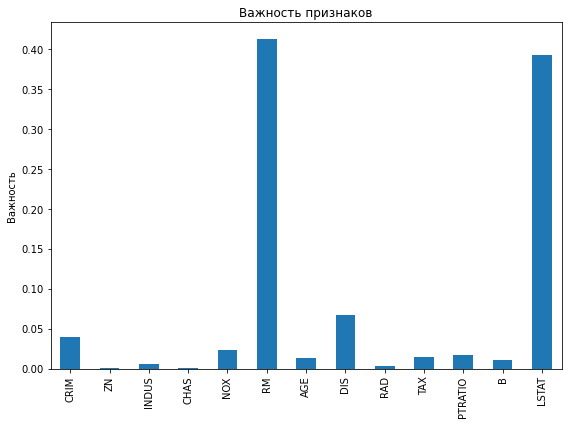

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
model_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()